In [21]:
import os
os.chdir('..')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import sys
caffe_root = '/home/lex/caffe-master/'  # CONFIGURAR PARA CADA PC!!
sys.path.append("/home/lex/caffe-master/python")

import caffe # Importa la libreria CAFFE

In [22]:
# Elegimos el tipo de solver para la red
solver = caffe.SGDSolver('/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/Arc_1_solver.prototxt')

In [24]:
# Configuramos el hardware que usaremos para entrenar
caffe.set_device(0)
caffe.set_mode_gpu()

In [ ]:
#Se realiza una pasada de SGD
solver.step(1)    


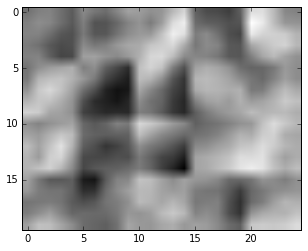

In [20]:
plt.imshow(solver.net.params['conv1'][0].diff[:, 0].reshape(4, 5, 5, 5)
       .transpose(0, 2, 1, 3).reshape(4*5, 5*5), cmap='gray')

In [20]:
%%time
niter = 200
test_interval = 25
# losses will also be stored isolver = caffe.SGDSolver('/home/lex/2_SISTEMIC/9_Deep_Learning/3_Arquitecturas/Arq_1/Arc_1_solver.prototxt')#images, labels = load_mnist('testing', digits=[2],path='/home/lex/caffe-master/data/mnist/')
n the log
train_loss = np.zeros(niter)
test_acc = np.zeros(int(np.ceil(niter / test_interval)))
output = npnp..zeros((niter, 8, 10))

# the main solver loop
for it in range(niter):
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss[it] = solver.net.blobs['loss'].data
    
    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    solver.test_nets[0].forward(start='conv1')
    output[it] = solver.test_nets[0].blobs['ip2'].data[:8]
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(100):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['ip2'].data.argmax(1)
                           == solver.test_nets[0].blobs['label'].data)
        test_acc[it // test_interval] = correct / 1e4

Iteration 0 testing...
Iteration 25 testing...
Iteration 50 testing...
Iteration 75 testing...
Iteration 100 testing...
Iteration 125 testing...
Iteration 150 testing...
Iteration 175 testing...
CPU times: user 5.26 s, sys: 820 ms, total: 6.08 s
Wall time: 5.39 s


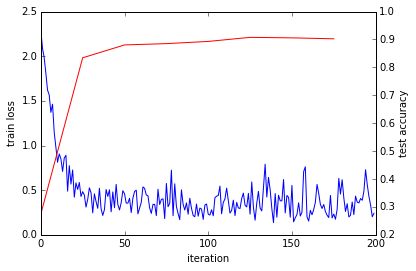

In [24]:
1#Imprimimos el train error y el test accuracy
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')#Imprimimos el train error y el test accuracy
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(np.arange(niter), train_loss)
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('tplt.subplot(1, 2, 1)
plt.imshow(filters[1],cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(filters[1], cmap='gray')rain loss')
ax2.set_ylabel('test accuracy')

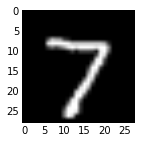

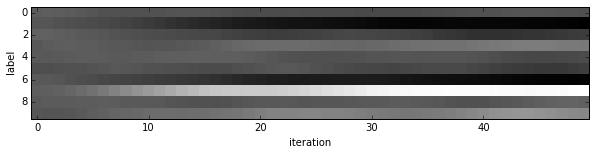

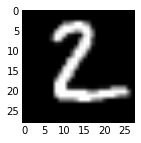

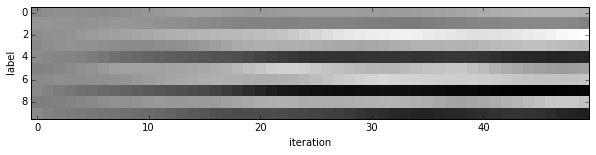

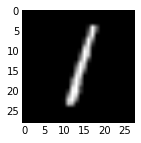

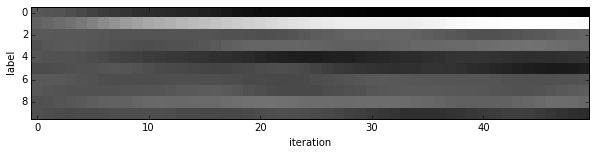

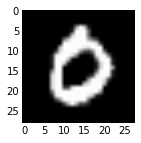

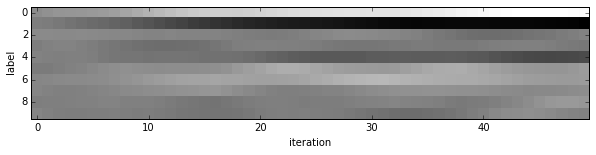

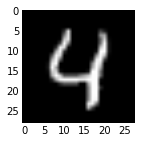

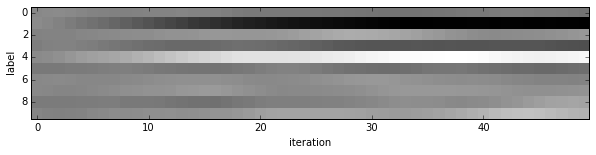

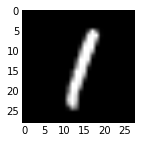

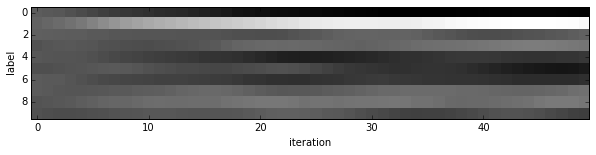

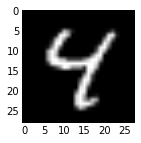

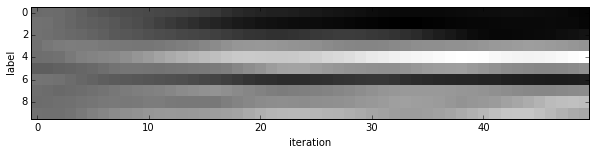

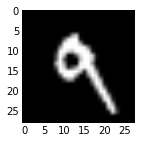

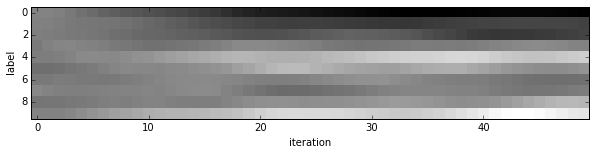

In [27]:
# Podemos ver como evoluciona el label a medida que iteramos
for i in range(8):
    plt.figure(figsize=(2, 2))
    plt.imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    plt.figure(figsize=(10, 2))
    plt.imshow(output[:50, i].T, interpolation='nearest', cmap='gray')
    plt.xlabel('iteration')
    plt.ylabel('label')

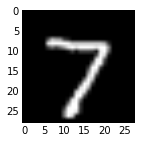

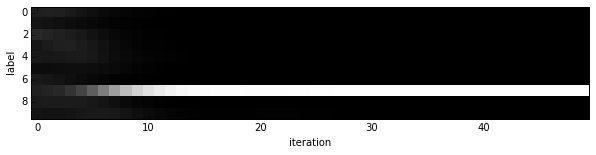

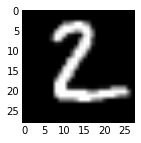

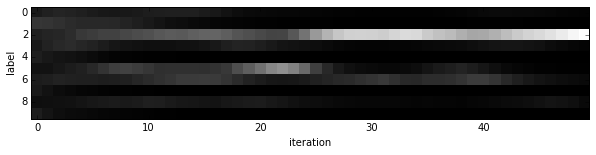

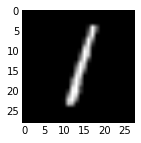

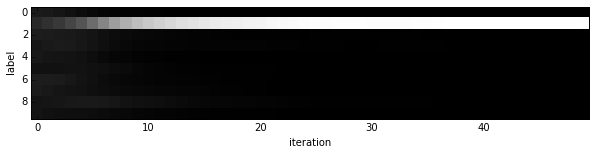

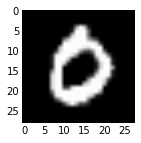

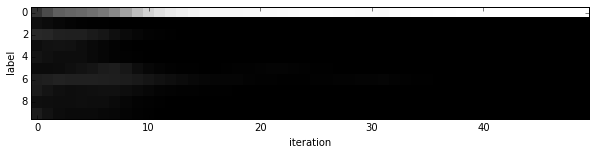

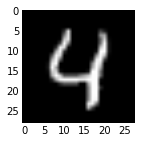

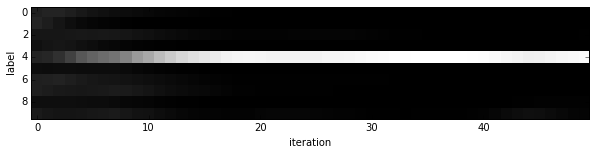

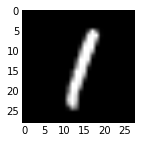

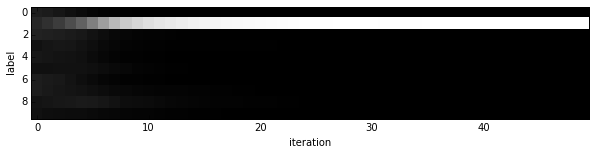

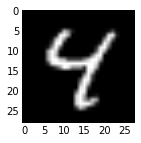

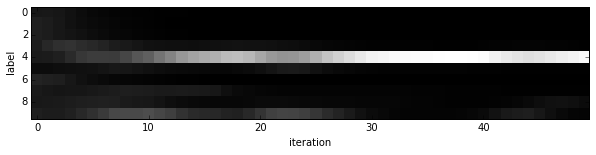

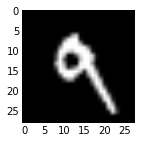

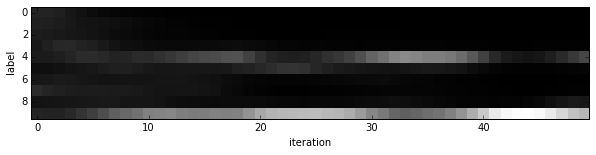

In [30]:
# Ahora veremos la salida del Softmax
for i in range(8):
    plt.figure(figsize=(2, 2))
    plt.imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    plt.figure(figsize=(10, 2))
    plt.imshow(np.import os-exp(output[:50, i].T) / np.exp(output[:50, i].T).sum(0), interpolation='nearest', cmap='gray')
    plt.xlabel('iteration')
    plt.ylabel('label')

In [35]:
from caffe import layers as L
from caffe import params as P

def lenet(lmdb, batch_size):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    n = caffe.NetSpec()
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             tr-ansform_param=dict(scale=1./255), ntop=2)
    n.conv1 = L.Convolution(n.data, kernel_size=5, num_output=20, weight_filler=dict(type='xavier'))
    n.pool1 = L.Pooling(n.conv1, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.conv2 = L.Convolution(n.pool1, kernel_size=5, num_output=50, weight_filler=dict(type='xavier'))
    n.pool2 = L.Pooling(n.conv2, kernel_size=2, stride=2, pool=P.Pooling.MAX)
    n.ip1 = L.InnerProduct(n.pool2, num_output=500, weight_filler=dict(type='xavier'))
    n.relu1 = L.ReLU(n.ip1, in_place=True)
    n.ip2 = L.InnerProduct(n.relu1, num_output=10, weight_filler=dict(type='xavier'))
    n.loss = L.SoftmaxWithLoss(n.ip2, n.label)
    return n.to_proto()
    
#with open('/home/pds/caffe-master/examples/mnist/lenet_auto_train.prototxt', 'w') as f:
    f.write(str(lenet('/home/pds/caffe-master/examples/mnist/mnist_train_lmdb', 64)))
    
#$with open('/home/pds/caffe-master/examples/mnist/lenet_auto_test.prototxt', 'w') as f:
    f.write(str(lenet('/home/pds/caffe-master/examples/mnist/mnist_test_lmdb', 100)))